## Student profile analysis to identify potential accomodation locations

## Introduction/Business Problem:
In the fast moving, effort-intense environment that a student inhabits,It’s a frequent occurrence that one is too tired to fix oneself a home-cooked meal. And of course, even if one gets home-cooked meals every day, it is not unusual to want to go out for a good meal every once in a while for social/recreational purposes. Either way, it’s a commonly understood idea that regardless of where one lives, the food one eats is an important aspect of the lifestyle one leads.

Now, imagine a scenario where a person has newly moved into a new location. They already have certain preferences, certain tastes. It would save both the student and the food providers a lot of hassle if the student lived close to their preferred outlets. Convenience means better sales, and saved time for the customer.

Food delivery apps aside, managers of restaurant chains and hotels can also leverage this information. For example, if a manager of a restaurant already knows the demographic of his current customers, they’d ideally want to open at a location where this demographic is at its highest concentration, ensuring short commute times to the location and more customers served.If potential hotel locations are being evaluated, a site that caters to a wide variety of tastes would be ideal, since one would want every guest to have something to their liking. 

Essentially, the problem statement is this:

“How can one identify trends in an individual’s* daily routine and leverage them?” 

*Here, a student


Let us first import all the packages we need for analysis.

In [437]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import geopandas as gpd
import matplotlib.cm as cm
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print("All packages imported!")

All packages imported!


Alright, now let us import the raw dataset for student preferences...

In [438]:
dfstudents=pd.read_csv('food_coded.csv')

We shall only take the columns useful to us:

In [439]:
dfclean=dfstudents[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
dfclean.dropna(axis=0,inplace=True)
dfclean.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


## Identifying the different kinds of students

Let us visualise the distrubtion of data with a boxplot:

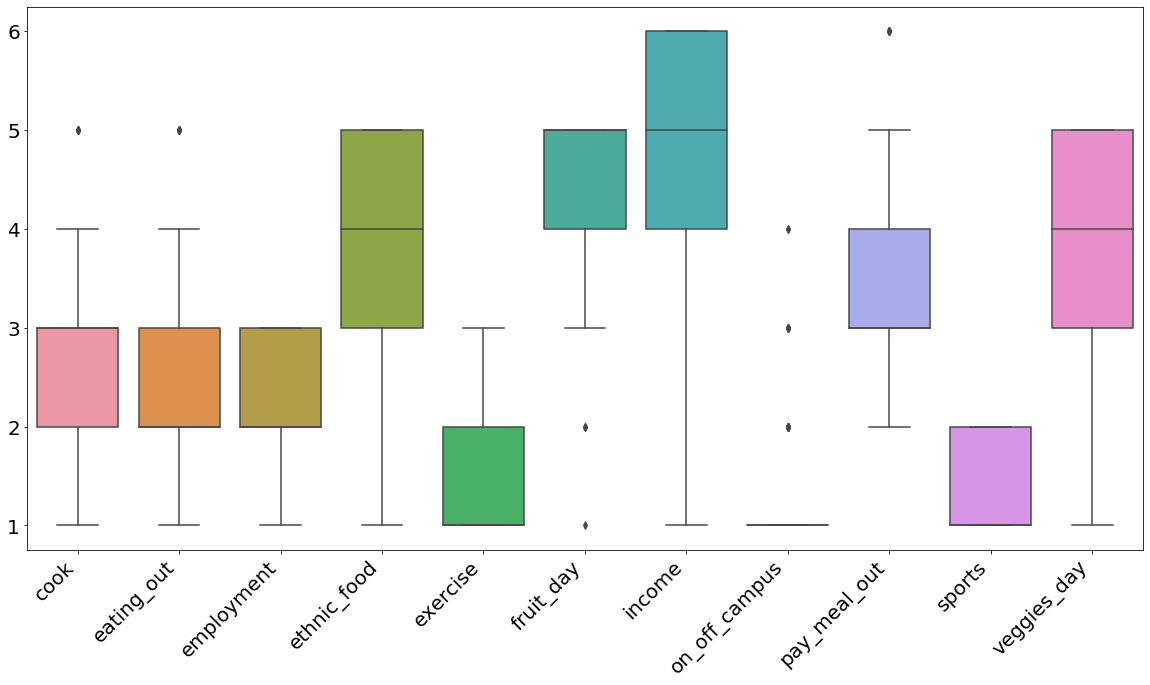

In [440]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = dfclean)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [490]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfclean)
dfclean['Cluster']=kmeans.labels_

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


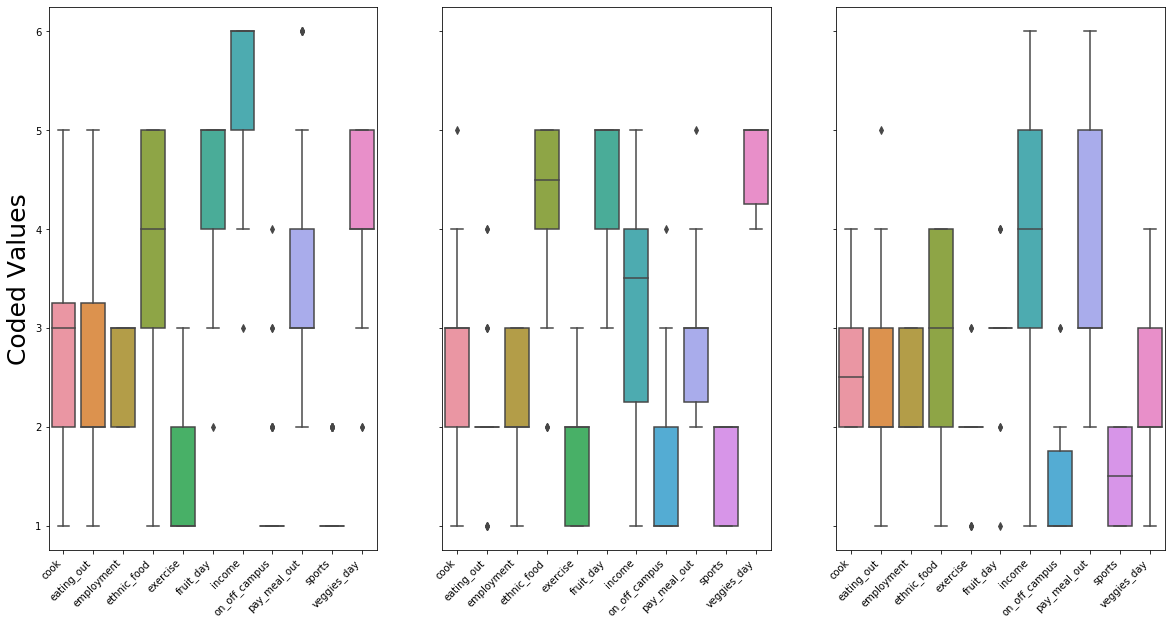

In [491]:
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=25)

for k in range(kclusters):
     plt.sca(axes[k])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(data = dfclean[dfclean['Cluster'] == k].drop('Cluster',1), ax=axes[k])
        
plt.show()

**Possible insights:**

Kmeans:
2 clusters: No clear demarcation is seen; we can't discriminate on 2 categories alone.

3 clusters: Now we see three clear groups: One high income group which insists on eating healthy, the other is more relaxed in diet.

The low income group has its own profile, as discussed in insights.

For higher numbers of clusters, it becomes difficult to draw any concrete conclusions.
   


High income students in general are:

1.>Much more likely to stay on campus.

2.>Less likely to cook.

3.>Eat out more often.

In addition, a subset of higher income students:
1.>Eat out less often.

2.>Have a healthier, more varied diet in general. (Eat ethnic food, fruits, vegetables etc.)

Lower income students are more likely to:

1.>Eat more vegetables

2.>Eat more fruits.

3.>More likely to cook, so more likely to stay off campus.

4.>Obviously, pay less for meals out.


Essentially, we need to think about accomodation for 2 types of students, low income and high income(varied diet).

The high income(fixed diet) students will ideally stay on campus, so they don't have to be taken into account.

# Finding the students a home

My analysis will be on the city I currently reside in, i.e Bangalore, India!

Specifically, I will begin by looking at the housing areas around my college.

We begin by defining the parameters of our foursquare seach query:

In [446]:
search_query = 'Apartment' #Search for residential locations
radius = 18000 #Set the radius to 18 kilometres due to traffic constraints
latitude=13.133521#College location
longitude=77.567135

Now to define our foursquare credentials:

In [447]:
CLIENT_ID = '5O2OQN1HOFBER5CQ4VJSEBU3PZ54Z3T31EGTNFJ0V04KSKZI'
CLIENT_SECRET = 'H2KIZ3QZRGZD2GVCOSSTL04SQ3N0Y5QWEWQKPQ1VTPQNF24R' 
VERSION = '20180604'
LIMIT = 200

Now to define the url:

In [448]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

Now, we pull the results of the query into a json file.

In [449]:
results = requests.get(url).json()

In [450]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4db7040e0437fa536a641766,Banaswadi Main Rd,IN,Bangalore,India,hight street,16096,"[Banaswadi Main Rd (hight street), Bangalore, ...","[{'label': 'display', 'lat': 13.00017043034296...",13.000170,77.624545,NaN,NaN,Karnātaka,Apartment Banaswadi main road cross hight stre...,v-1567142284
1,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,594f23a82be42528bc56a739,NaN,IN,Bangalore,India,NaN,2242,"[Bangalore 560064, Karnātaka, India]","[{'label': 'display', 'lat': 13.113421, 'lng':...",13.113421,77.568541,NaN,560064,Karnātaka,JS Tulips Apartment,v-1567142284
2,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,51319d59e4b04a7c6799abe4,Ananthapura Road,IN,Bangalore,India,Yelahanka New Town,2120,"[Ananthapura Road (Yelahanka New Town), Bangal...","[{'label': 'display', 'lat': 13.11488202331476...",13.114882,77.563090,NaN,560064,Karnātaka,GK Lakeview Apartment,v-1567142284
3,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,56133261498e95c619c830f8,NaN,IN,Bangalore,India,NaN,10541,"[Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 13.03949179789228...",13.039492,77.555590,NaN,NaN,Karnātaka,Dwellington Apartment,v-1567142284
4,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",False,52dd2fd2498ebd1fc2edf286,NaN,IN,NaN,India,NaN,3954,[India],"[{'label': 'display', 'lat': 13.09824, 'lng': ...",13.098240,77.571384,NaN,NaN,NaN,apartments stop,v-1567142284


Some categories don't mean much to us, such as ID and referralID. Let's only take the fields relevant to us:

In [484]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.drop([4,17,18,21,24,30,43],axis=0,inplace=True) #remove some unwanted locations like hotels
dataframe_filtered.drop(['cc','country','state','city','neighborhood'],axis=1,inplace=True) #no need for those columns as we know we're in Bangalore,IN
dataframe_filtered.head()

,name,categories,address,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,id
0,Apartment Banaswadi main road cross hight stre...,Residential Building (Apartment / Condo),Banaswadi Main Rd,hight street,16096,"[Banaswadi Main Rd (hight street), Bangalore, ...","[{'label': 'display', 'lat': 13.00017043034296...",13.000170,77.624545,NaN,4db7040e0437fa536a641766
1,JS Tulips Apartment,Residential Building (Apartment / Condo),NaN,NaN,2242,"[Bangalore 560064, Karnātaka, India]","[{'label': 'display', 'lat': 13.113421, 'lng':...",13.113421,77.568541,560064,594f23a82be42528bc56a739
2,GK Lakeview Apartment,Residential Building (Apartment / Condo),Ananthapura Road,Yelahanka New Town,2120,"[Ananthapura Road (Yelahanka New Town), Bangal...","[{'label': 'display', 'lat': 13.11488202331476...",13.114882,77.563090,560064,51319d59e4b04a7c6799abe4
3,Dwellington Apartment,Residential Building (Apartment / Condo),NaN,NaN,10541,"[Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 13.03949179789228...",13.039492,77.555590,NaN,56133261498e95c619c830f8
5,Shriram Sahaana Apartments,Residential Building (Apartment / Condo),Yelahanka,1st Cross Suryavamshi Layout,629,"[Yelahanka (1st Cross Suryavamshi Layout), Ban...","[{'label': 'display', 'lat': 13.13572688743380...",13.135727,77.572482,560064,5cb56f988c35dc002c58ad07


Let us plot all these potential locations on a map of Bangalore:

In [492]:
#define coordinates of the college
map_bang=folium.Map(location=[12.971599,77.594566],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
labels = list(dataframe_filtered.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_bang)    
    
# add incidents to map
map_bang.add_child(locations)

# add incidents to map
map_bang.add_child(locations)

map_bang

Now, let's figure out which locations are ideal for which kinds of student. 

We will keep in mind the fact that the lower income students need a steady supply of fresh fruits, while the high income students need plenty of restaurant options to choose from.

In [475]:
df_evaluate=dataframe_filtered[['lat','lng']]

In [454]:
RestList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 5000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    RestList.append(dataframe_filtered2['categories'].count())


In [476]:
df_evaluate['Restaurants']=RestList

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [456]:
FruitList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 5000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Fruit' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    FruitList.append(dataframe_filtered2['categories'].count())


In [477]:
df_evaluate['Fruits,Vegetables,Groceries']=FruitList

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [478]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate.head(10)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,lat,lng,Restaurants,"Fruits,Vegetables,Groceries",Cluster
0,13.000170,77.624545,50,49,0
1,13.113421,77.568541,23,7,2
2,13.114882,77.563090,12,4,2
3,13.039492,77.555590,50,29,1
5,13.135727,77.572482,13,3,2
6,13.134563,77.572646,13,3,2
7,12.979005,77.645620,49,49,0
8,13.069250,77.595719,49,19,1
9,13.064801,77.572098,50,18,1
10,13.063300,77.580675,50,20,1


In [482]:
#define coordinates of the college
map_bang=folium.Map(location=[12.971599,77.594566],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()
# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_evaluate.lat)
longitudes = list(df_evaluate.lng)
labels = list(df_evaluate.Cluster)
names=list(dataframe_filtered.name)
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bang)

# add locations to map
map_bang.add_child(locations)

map_bang

    

Applying K-Means, we find 3 prominent clusters:

Cluster 0(Green) Where both (fruits and vegetables) and (restaurants) are abundant

Cluster 1(Yellow): Restaurants are plentiful, but groceries less so.

Cluster 2(Red): Restaurants and groceries are relatively hard to find.

Now, one can easily predict where which kind of student will prefer to stay!

## Discussion

One can easily notice, the further away from the college and the closer to the city centre one gets, the more options one finds for food.

The same can be said about other amenities as well.

One thing I would like to note is that the foursquare data seems incomplete; Many locations seem to be missing or ill-classified. India definitely needs better locational data sets!



## Conclusion

Foursquare data is limited but can provide insights into a city’s infrastructure. This data could be supplemented with other sources to provide better results.